<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Evaluation of effects of different parameters on Bias using Python

Problem Statement: 

Estimate the model using ordinary least squares. The estimated rho value that you will find will be biased. 
Write a simulation to study this bias. See if you can find the functional form of the bias via simulation.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt# this helps to display graph
import pandas as pd

Differnt values of rho on bias, keeping size constant
[-0.020735012822943988, -0.020469282681361056, -0.02174777919674198, -0.02332915464294838, -0.02634552958352432]
Differnt values of sizes on bias, keeping rho constant
[-0.020735012822943988, -0.0335262746598427, 0.0007577088023813516, 0.0021248283928224643, -0.0006980211500969835]


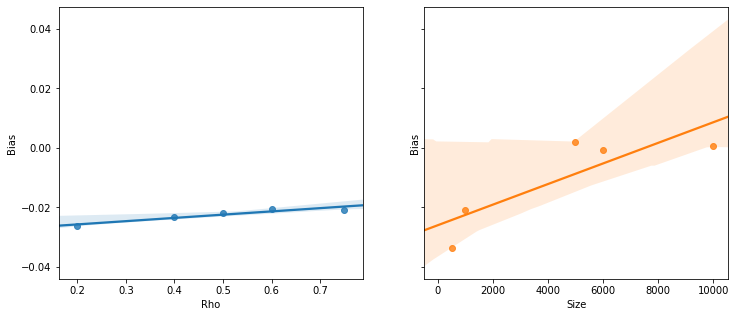

In [4]:

def data(n,rho):
    np.random.seed(1)
    x = np.random.normal(size=(n,))
    for i in range(1,n):
        x[i] += rho*x[i-1]

    yvec = x[1:]
    xvec = x[:-1].reshape(-1,1)
    ones = np.ones((n-1,1))
    xvec = np.hstack((ones,xvec))
    b = np.linalg.solve(xvec.T@xvec,xvec.T@yvec)
    de=b[1]-rho
    return(de)

def main():
    
    #checking the effect of differnt values of rho on bias, keeping size constant
    rho= np.array([0.75, 0.60, 0.50, 0.40, 0.20])
    n = 1000
    k=[]
    for r in rho:
        k.append(data(n,r))
    print("Differnt values of rho on bias, keeping size constant")
    print(k)
    #checking the effect of differnt values of sizes on bias, keeping rho constant
    rho1= 0.75
    n1 = np.array([1000, 500, 10000, 5000, 6000])
    s=[]
    for r in n1:
        s.append(data(r,rho1))
    print("Differnt values of sizes on bias, keeping rho constant")
    print(s)
    plot(rho,k,n1,s)
    
def plot(x1,y1,x2,y2):
    fig, axs = plt.subplots(ncols=2, nrows=1,sharey=True,figsize=(12,5))
    axs = axs.flatten()
    #Plot to explian the effect of differnt values of rho on bias, keeping size constant
    f1 = pd.DataFrame({'Rho': x1, 'Bias': y1})
    sns.regplot(x='Rho', y='Bias', data=f1, ax=axs[0])
    # Plot to explian the effect of differnt values of sizes on bias, keeping rho constant
    f2 = pd.DataFrame({'Size': x2, 'Bias': y2})
    sns.regplot(x='Size', y='Bias',data=f2, ax=axs[1])
    
main()